In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('26NOV.csv', sep = ';')
df

,Couple,g1,g2,g3,g4,g5,g6,g7,Medical expert,Pregnancy,Nr. of live birth
0,a1,36,1,6,4,3,16,3,3,1,1
1,a2,28,1,2,5,2,20,5,2,0,0
2,a3,38,1,6,1,3,14,4,2,0,0
3,a4,28,6,2,6,3,8,3,2,0,0
4,a5,44,3,2,3,1,11,3,3,0,0
5,a6,42,4,4,3,3,14,5,3,0,0
6,a7,30,1,6,4,2,7,3,2,0,0
7,a8,33,2,4,4,3,17,5,2,0,0
8,a9,36,3,5,2,3,9,2,2,2,1
9,a10,27,2,2,4,3,16,5,2,0,0


In [3]:
df.groupby('Medical expert').size()

Medical expert
1     5
2    40
3     9
4     5
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
g1,59.0,34.559322,4.202918,26.0,32.5,34.0,38.0,44.0
g2,59.0,3.322034,2.200632,1.0,2.0,3.0,3.0,13.0
g3,59.0,3.305085,1.500049,1.0,2.5,3.0,4.0,6.0
g4,59.0,3.135593,1.121231,1.0,2.0,3.0,4.0,6.0
g5,59.0,2.898305,0.402360,1.0,3.0,3.0,3.0,3.0
g6,59.0,13.576271,3.119479,5.0,12.0,14.0,16.0,20.0
g7,59.0,3.796610,1.242629,1.0,3.0,4.0,5.0,5.0
Medical expert,59.0,2.237288,0.727276,1.0,2.0,2.0,2.0,4.0
Pregnancy,59.0,0.779661,0.744353,0.0,0.0,1.0,1.0,2.0
Nr. of live birth,59.0,0.576271,0.648696,0.0,0.0,0.0,1.0,2.0


In [5]:
df=df.drop(columns=['Couple','Pregnancy','Nr. of live birth '])

In [6]:
df.columns

Index(['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'Medical expert'], dtype='object')

In [7]:
Y=df['Medical expert']

In [8]:
X=df.drop(columns=['Medical expert'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,shuffle=True,test_size=0.3,random_state=1, stratify=Y)

In [10]:
X_train

,g1,g2,g3,g4,g5,g6,g7
55,40,3,1,2,3,12,3
7,33,2,4,4,3,17,5
36,33,3,4,5,3,16,5
22,40,3,1,2,3,12,3
0,36,1,6,4,3,16,3
49,32,3,1,3,3,16,4
52,34,3,3,2,3,13,5
46,33,2,3,4,3,15,4
4,44,3,2,3,1,11,3
45,31,2,3,2,3,16,5


In [11]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

# FFMC, DMC, DC, ISI, RH
X_train['g1'] = minmax.fit_transform(np.array(X_train['g1']).reshape(-1,1))


In [12]:
X_train

,g1,g2,g3,g4,g5,g6,g7
55,0.777778,3,1,2,3,12,3
7,0.388889,2,4,4,3,17,5
36,0.388889,3,4,5,3,16,5
22,0.777778,3,1,2,3,12,3
0,0.555556,1,6,4,3,16,3
49,0.333333,3,1,3,3,16,4
52,0.444444,3,3,2,3,13,5
46,0.388889,2,3,4,3,15,4
4,1.000000,3,2,3,1,11,3
45,0.277778,2,3,2,3,16,5


In [13]:
X_test['g1'] = minmax.transform(np.array(X_test['g1']).reshape(-1, 1))

In [14]:
X_test

,g1,g2,g3,g4,g5,g6,g7
8,0.555556,3,5,2,3,9,2
9,0.055556,2,2,4,3,16,5
56,0.444444,3,3,2,3,13,5
13,0.055556,2,3,3,3,18,4
51,0.777778,3,1,2,3,12,3
20,0.388889,12,5,3,3,14,4
10,0.722222,3,4,3,3,5,1
18,0.333333,3,1,3,3,14,4
1,0.111111,1,2,5,2,20,5
21,0.611111,2,6,2,3,14,1


In [15]:
X_train['g6'] = minmax.fit_transform(np.array(X_train['g6']).reshape(-1,1))

In [16]:
X_train

,g1,g2,g3,g4,g5,g6,g7
55,0.777778,3,1,2,3,0.384615,3
7,0.388889,2,4,4,3,0.769231,5
36,0.388889,3,4,5,3,0.692308,5
22,0.777778,3,1,2,3,0.384615,3
0,0.555556,1,6,4,3,0.692308,3
49,0.333333,3,1,3,3,0.692308,4
52,0.444444,3,3,2,3,0.461538,5
46,0.388889,2,3,4,3,0.615385,4
4,1.000000,3,2,3,1,0.307692,3
45,0.277778,2,3,2,3,0.692308,5


In [17]:
X_test['g6'] = minmax.transform(np.array(X_test['g6']).reshape(-1, 1))

In [18]:
X_test

,g1,g2,g3,g4,g5,g6,g7
8,0.555556,3,5,2,3,0.153846,2
9,0.055556,2,2,4,3,0.692308,5
56,0.444444,3,3,2,3,0.461538,5
13,0.055556,2,3,3,3,0.846154,4
51,0.777778,3,1,2,3,0.384615,3
20,0.388889,12,5,3,3,0.538462,4
10,0.722222,3,4,3,3,-0.153846,1
18,0.333333,3,1,3,3,0.538462,4
1,0.111111,1,2,5,2,1.000000,5
21,0.611111,2,6,2,3,0.538462,1


In [19]:
clf = MLPClassifier(hidden_layer_sizes=(350),random_state=1,activation= 'relu',solver='lbfgs', max_iter=1000,alpha=0.0001,early_stopping=True)


In [20]:
clf.fit(X_train, y_train)
print('train',clf.score(X_train, y_train))

train 1.0


In [21]:
from sklearn.metrics import confusion_matrix

C:\Users\sanaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


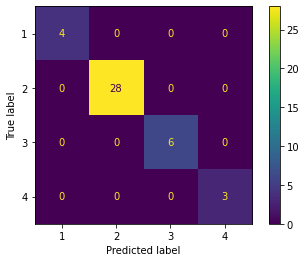

In [22]:
plot_confusion_matrix(clf, X_train, y_train)
plt.show()

In [23]:
y_pred_test=clf.predict(X_test)
y_pred_train=clf.predict(X_train)
print('train_matrix',classification_report(y_train, y_pred_train))
print('test_matrix',classification_report(y_test, y_pred_test))

train_matrix               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

test_matrix               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.90      0.75      0.82        12
           3       0.40      0.67      0.50         3
           4       1.00      1.00      1.00         2

    accuracy                           0.78        18
   macro avg       0.82      0.85      0.83        18
weighted avg       0.83      0.78      0.80        18



C:\Users\sanaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


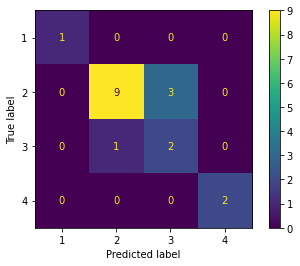

In [24]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [25]:
from imblearn.over_sampling import SMOTE 

In [26]:
sm = SMOTE(k_neighbors = 2,random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (41, 7)
Shape of X after SMOTE: (112, 7)

Balance of positive and negative classes (%):


4    25.0
2    25.0
3    25.0
1    25.0
Name: Medical expert, dtype: float64

In [27]:
clf = MLPClassifier(hidden_layer_sizes=(125,5),random_state=1,activation= 'relu',solver='lbfgs', max_iter=1000,alpha=0.0001,early_stopping=True)


In [28]:
clf.fit(X_sm, y_sm)
print('train',clf.score(X_sm, y_sm))

train 0.9642857142857143


C:\Users\sanaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


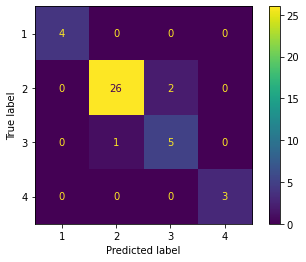

In [32]:
plot_confusion_matrix(clf, X_train, y_train)
plt.show()

In [29]:
print('test',clf.score(X_test, y_test))

test 0.9444444444444444


In [30]:
y_pred_test=clf.predict(X_test)
y_pred_train=clf.predict(X_sm)
print('train_matrix',classification_report(y_sm, y_pred_train))
print('test_matrix',classification_report(y_test, y_pred_test))

train_matrix               precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       0.93      0.93      0.93        28
           3       0.93      0.93      0.93        28
           4       1.00      1.00      1.00        28

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112

test_matrix               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.92      0.96        12
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         2

    accuracy                           0.94        18
   macro avg       0.94      0.98      0.95        18
weighted avg       0.96      0.94      0.95        18



C:\Users\sanaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


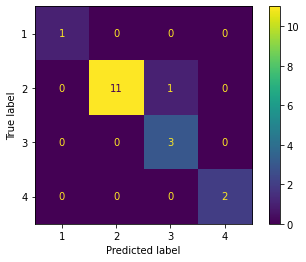

In [31]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()